In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive



## **Splitting and Visualizing**

## Aim:
To prepare balanced training and benchmarking datasets for studying signal peptides and comparing machine learning models.

### Key Functions:

1. **split_lines Function**:
   - **Purpose**: Create separate training and benchmarking datasets from a text file.
   - **How**:
     - Reads all lines from the input file.
     - Randomly shuffles the lines.
     - Splits the shuffled lines into training (80%) and benchmarking (20%) sets.
     - Saves these sets into separate files.

2. **visualize_splits Function**:
   - **Purpose**: Visualize the distribution of lines between the training and benchmarking sets.
   - **How**:
     - Uses a bar chart to display the count of lines in each set, ensuring a balanced split.

### Main Execution:

- **Objective**: Ensure unbiased and representative datasets for machine learning tasks.
- **Process**:
  - Define file paths and splitting parameters.
  - Execute `split_lines` for each text file.
  - Visualize the results using `visualize_splits`.


Splitting completed for /content/drive/MyDrive/LB2/second_try/To_benchmark_positive.txt.
Training data saved to /content/drive/MyDrive/LB2/second_try/Positive_training.txt
Benchmarking data saved to /content/drive/MyDrive/LB2/second_try/Positive_benchmarking.txt
Splitting completed for /content/drive/MyDrive/LB2/second_try/To_benchmark_negative.txt.
Training data saved to /content/drive/MyDrive/LB2/second_try/Negative_training.txt
Benchmarking data saved to /content/drive/MyDrive/LB2/second_try/Negative_benchmarking.txt


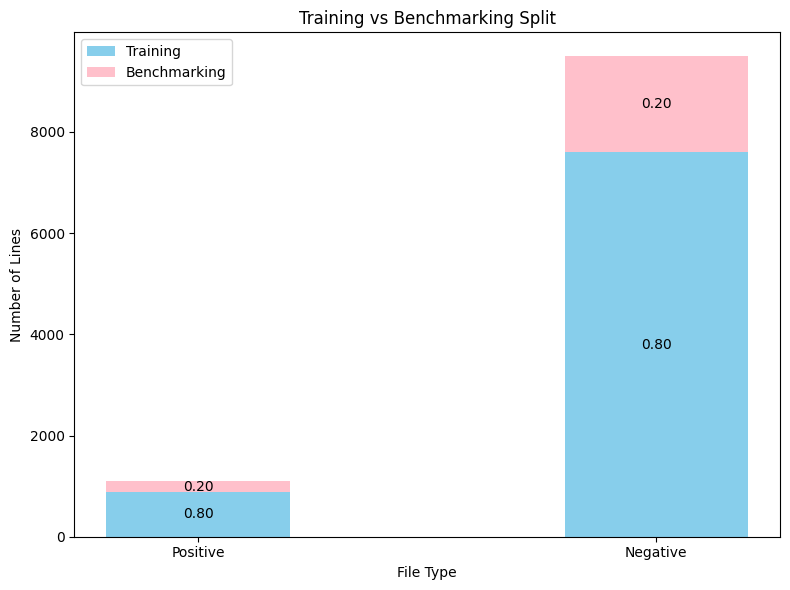

In [ ]:
import random
import os
import matplotlib.pyplot as plt
import pandas as pd

# Function to split lines into training and benchmarking files
def split_lines(input_file, training_file, benchmarking_file, split_ratio=0.8):
    with open(input_file, 'r') as infile:
        lines = infile.readlines()

    random.shuffle(lines)  # Shuffle the lines randomly

    split_index = int(len(lines) * split_ratio)
    training_lines = lines[:split_index]
    benchmarking_lines = lines[split_index:]

    with open(training_file, 'w') as train_file:
        train_file.writelines(training_lines)

    with open(benchmarking_file, 'w') as bench_file:
        bench_file.writelines(benchmarking_lines)

    print(f"Splitting completed for {input_file}.")
    print(f"Training data saved to {training_file}")
    print(f"Benchmarking data saved to {benchmarking_file}")

    return len(training_lines), len(benchmarking_lines)

def visualize_splits(split_info):
    labels = [info['label'] for info in split_info]
    training_counts = [info['training'] for info in split_info]
    benchmarking_counts = [info['benchmarking'] for info in split_info]
    total_counts = [training_counts[i] + benchmarking_counts[i] for i in range(len(training_counts))]
    training_ratios = [training_counts[i] / total_counts[i] for i in range(len(training_counts))]
    benchmarking_ratios = [benchmarking_counts[i] / total_counts[i] for i in range(len(benchmarking_counts))]

    x = range(len(labels))

    plt.figure(figsize=(8, 6))  # Reasonable figure size
    plt.bar(x, training_counts, width=0.4, color='skyblue', label='Training')
    plt.bar(x, benchmarking_counts, width=0.4, color='pink', bottom=training_counts, label='Benchmarking')

    for i in range(len(labels)):
        plt.text(x[i], training_counts[i] / 2, f'{training_ratios[i]:.2f}', ha='center', va='center', color='black', fontsize=10)
        plt.text(x[i], training_counts[i] + (benchmarking_counts[i] / 2), f'{benchmarking_ratios[i]:.2f}', ha='center', va='center', color='black', fontsize=10)

    plt.xlabel('File Type')
    plt.ylabel('Number of Lines')
    plt.title('Training vs Benchmarking Split')
    plt.xticks(x, labels)
    plt.legend()
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.show()

# Main script execution
if __name__ == "__main__":
    base_path = "/content/drive/MyDrive/LB2/second_try/"

    # Splitting text files
    files_to_split = [
        {
            "input": os.path.join(base_path, "To_benchmark_positive.txt"),
            "training": os.path.join(base_path, "Positive_training.txt"),
            "benchmarking": os.path.join(base_path, "Positive_benchmarking.txt"),
            "label": "Positive"
        },
        {
            "input": os.path.join(base_path, "To_benchmark_negative.txt"),
            "training": os.path.join(base_path, "Negative_training.txt"),
            "benchmarking": os.path.join(base_path, "Negative_benchmarking.txt"),
            "label": "Negative"
        }
    ]

    split_info = []
    for file_info in files_to_split:
        training_count, benchmarking_count = split_lines(file_info["input"], file_info["training"], file_info["benchmarking"])
        split_info.append({
            "label": file_info["label"],
            "training": training_count,
            "benchmarking": benchmarking_count
        })

    visualize_splits(split_info)


### **Function to Check Overlapping Entries**
we want to keep the benchmark as unseen dataset for blind test later so it should not have any commen entry

In [ ]:
import pandas as pd

def check_overlapping_entries(positive_training_path, negative_training_path, positive_benchmarking_path, negative_benchmarking_path, sep='\t'):
    # Load positive training data
    positive_training_data = pd.read_csv(positive_training_path, sep=sep)

    # Load negative training data
    negative_training_data = pd.read_csv(negative_training_path, sep=sep)

    # Load positive benchmarking data
    positive_benchmarking_data = pd.read_csv(positive_benchmarking_path, sep=sep)

    # Load negative benchmarking data
    negative_benchmarking_data = pd.read_csv(negative_benchmarking_path, sep=sep)

    # Extract unique identifiers from each dataset
    positive_training_entries = positive_training_data.iloc[:, 0].unique()
    negative_training_entries = negative_training_data.iloc[:, 0].unique()
    positive_benchmarking_entries = positive_benchmarking_data.iloc[:, 0].unique()
    negative_benchmarking_entries = negative_benchmarking_data.iloc[:, 0].unique()

    # Combine training entries and benchmarking entries
    training_entries = set(positive_training_entries) | set(negative_training_entries)
    benchmarking_entries = set(positive_benchmarking_entries) | set(negative_benchmarking_entries)

    # Find overlapping entries
    overlapping_entries = training_entries & benchmarking_entries

    print("Number of unique training entries:", len(training_entries))
    print("Number of unique benchmarking entries:", len(benchmarking_entries))
    print("Number of overlapping entries:", len(overlapping_entries))

    # If there are overlapping entries, print them
    if len(overlapping_entries) > 0:
        print("Overlapping entries:")
        print(overlapping_entries)
    else:
        print("No overlapping entries found between training and benchmarking datasets.")


positive_training_path = '/content/drive/MyDrive/LB2/second_try/Positive_training.txt'
negative_training_path = '/content/drive/MyDrive/LB2/second_try/Negative_training.txt'
positive_benchmarking_path = '/content/drive/MyDrive/LB2/second_try/Positive_benchmarking.txt'
negative_benchmarking_path = '/content/drive/MyDrive/LB2/second_try/Negative_benchmarking.txt'

check_overlapping_entries(positive_training_path, negative_training_path, positive_benchmarking_path, negative_benchmarking_path)


Number of unique training entries: 8474
Number of unique benchmarking entries: 2118
Number of overlapping entries: 0
No overlapping entries found between training and benchmarking datasets.


## **Splitting and Analyzing TSV Files**

## Aim:
To study the distribution of signal peptide lengths in training and benchmarking datasets for effective model comparison.

### Key Functions:

1. **extract_numbers Function**:
   - **Purpose**: Extract signal peptide (SP) lengths.
   - **How**:
     - Uses regular expressions to find and extract the number following ".." in the 'Signal peptide' field.

2. **split_tsv_file Function**:
   - **Purpose**: Split the TSV file into training and benchmarking sets.
   - **How**:
     - Reads the TSV file into a DataFrame.
     - Randomly samples 80% for training and leaves 20% for benchmarking.
     - Saves these sets into separate TSV files.

3. **analyze_sp_lengths Function**:
   - **Purpose**: Analyze and visualize SP length distributions.
   - **How**:
     - Extracts SP lengths and prints summary statistics.
     - Plots a histogram of SP lengths.

4. **extract_and_visualize Function**:
   - **Purpose**: Compare SP length distributions between training and benchmarking sets.
   - **How**:
     - Reads the TSV files.
     - Extracts SP lengths and plots overlapping histograms.
     - Prints min, max, and median SP lengths.

### Main Execution:

- **Objective**: Ensure representative training and benchmarking sets and understand SP length distributions.
- **Process**:
  - Split `positive.tsv` into training and benchmarking sets.
  - Analyze SP lengths to check for anomalies or biases.
  - Visualize SP length distributions for comparison.


Splitting completed for /content/drive/MyDrive/LB2/second_try/positive.tsv.
Training data saved to /content/drive/MyDrive/LB2/second_try/training_positive.tsv with 705 rows.
Benchmarking data saved to /content/drive/MyDrive/LB2/second_try/benchmarking_positive.tsv with 176 rows.

Analyzing SP lengths in the training data:
Missing values in 'Signal peptide': 0
Summary statistics for SP lengths:
 count    693.000000
mean      23.036075
std        6.055631
min        7.000000
25%       19.000000
50%       22.000000
75%       25.000000
max       64.000000
Name: Extracted Numbers, dtype: float64


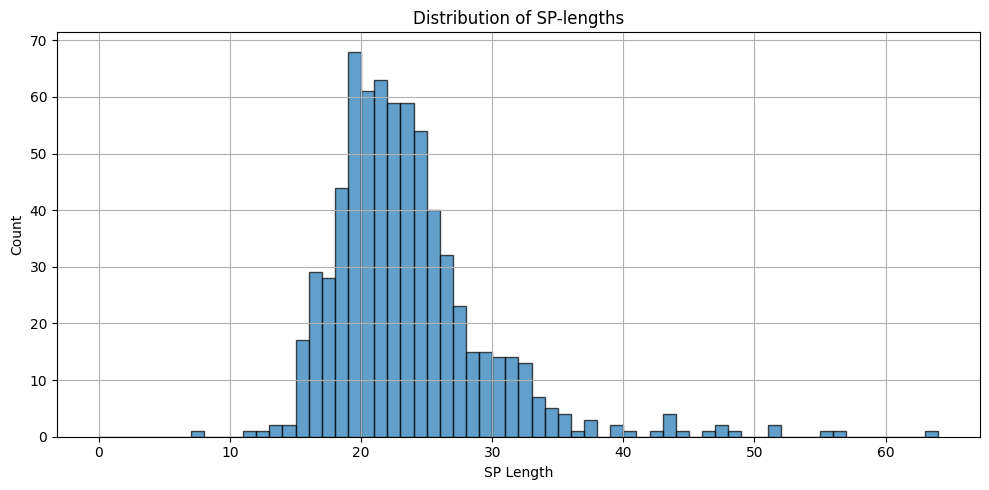


Analyzing SP lengths in the benchmarking data:
Missing values in 'Signal peptide': 0
Summary statistics for SP lengths:
 count    173.000000
mean      22.872832
std        5.108817
min       14.000000
25%       19.000000
50%       22.000000
75%       26.000000
max       40.000000
Name: Extracted Numbers, dtype: float64


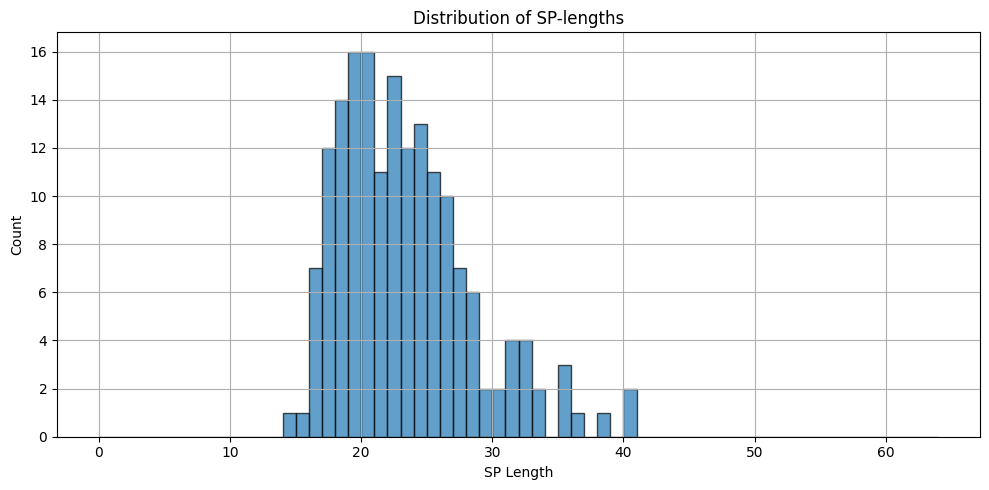

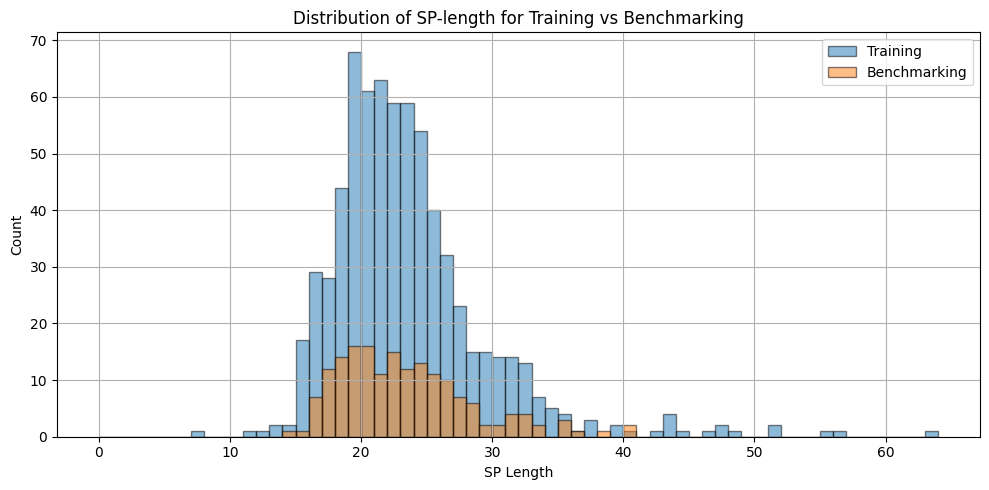

Training SP Lengths - Min: 7.0 Max: 64.0 Median: 22.0
Benchmarking SP Lengths - Min: 14.0 Max: 40.0 Median: 22.0


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

# Function to extract the second number (after "..") from a given string
def extract_numbers(text):
    matches = re.search(r'SIGNAL\s\d+\.\.(\d+)', text)
    if matches:
        return int(matches.group(1))
    return None

# Function to split the TSV file into training and benchmarking sets
def split_tsv_file(input_file, training_file, benchmarking_file, split_ratio=0.8):
    df = pd.read_csv(input_file, sep='\t')
    training_df = df.sample(frac=split_ratio, random_state=42)  # Randomly sample with a fixed seed for reproducibility
    benchmarking_df = df.drop(training_df.index)

    training_df.to_csv(training_file, sep='\t', index=False)
    benchmarking_df.to_csv(benchmarking_file, sep='\t', index=False)

    return len(training_df), len(benchmarking_df)

# Function to analyze the distribution of SP lengths
def analyze_sp_lengths(df, column_name):
    # Check for missing values
    missing_values = df[column_name].isnull().sum()
    print(f"Missing values in '{column_name}': {missing_values}")

    # Extract SP lengths
    df['Extracted Numbers'] = df[column_name].apply(lambda x: extract_numbers(x) if pd.notnull(x) else None)

    # Summary statistics
    summary_stats = df['Extracted Numbers'].describe()
    print("Summary statistics for SP lengths:\n", summary_stats)

    # Plot the histogram
    plt.figure(figsize=(10, 5))
    bins = range(0, 65, 1)  # Bins from 0 to 64 with a width of 1
    plt.hist(df['Extracted Numbers'].dropna(), bins=bins, alpha=0.7, edgecolor='black')
    plt.xlabel('SP Length')
    plt.ylabel('Count')
    plt.title('Distribution of SP-lengths')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Function to extract numbers and visualize distributions
def extract_and_visualize(tsv_file1, tsv_file2, column_name):
    try:
        df1 = pd.read_csv(tsv_file1, sep='\t')
        df2 = pd.read_csv(tsv_file2, sep='\t')
    except FileNotFoundError as e:
        print(f"File not found: {e.filename}")
        return

    # Check if the column exists
    if column_name not in df1.columns or column_name not in df2.columns:
        print(f"Column '{column_name}' not found in one of the files.")
        return

    # Extract the second number from the specified column in both DataFrames
    df1['Extracted Numbers'] = df1[column_name].apply(lambda x: extract_numbers(x) if pd.notnull(x) else None)
    df2['Extracted Numbers'] = df2[column_name].apply(lambda x: extract_numbers(x) if pd.notnull(x) else None)

    # Create a figure with a single subplot for comparison
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot the first histogram with adjusted bins
    bins = range(0, 65, 1)  # Bins from 0 to 64 with a width of 1
    ax.hist(df1['Extracted Numbers'].dropna(), bins=bins, alpha=0.5, label='Training', edgecolor='black')

    # Plot the second histogram with adjusted bins
    ax.hist(df2['Extracted Numbers'].dropna(), bins=bins, alpha=0.5, label='Benchmarking', edgecolor='black')

    ax.set_xlabel('SP Length')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of SP-length for Training vs Benchmarking')
    ax.grid(True)
    ax.legend()

    # Adjust layout and show the figure
    plt.tight_layout()
    plt.show()

    # Print min, max, and median
    print("Training SP Lengths - Min:", df1['Extracted Numbers'].min(), "Max:", df1['Extracted Numbers'].max(), "Median:", df1['Extracted Numbers'].median())
    print("Benchmarking SP Lengths - Min:", df2['Extracted Numbers'].min(), "Max:", df2['Extracted Numbers'].max(), "Median:", df2['Extracted Numbers'].median())

# Main script execution for TSV files
if __name__ == "__main__":
    base_path = "/content/drive/MyDrive/LB2/second_try/"

    # Splitting the positive.tsv file into training and benchmarking sets
    input_tsv = os.path.join(base_path, "positive.tsv")
    training_tsv = os.path.join(base_path, "training_positive.tsv")
    benchmarking_tsv = os.path.join(base_path, "benchmarking_positive.tsv")

    training_count, benchmarking_count = split_tsv_file(input_tsv, training_tsv, benchmarking_tsv)
    print(f"Splitting completed for {input_tsv}.")
    print(f"Training data saved to {training_tsv} with {training_count} rows.")
    print(f"Benchmarking data saved to {benchmarking_tsv} with {benchmarking_count} rows.")

    # Analyze and visualize SP lengths distribution
    column_name = "Signal peptide"  # Update this based on the actual column name in your TSV file
    print("\nAnalyzing SP lengths in the training data:")
    analyze_sp_lengths(pd.read_csv(training_tsv, sep='\t'), column_name)
    print("\nAnalyzing SP lengths in the benchmarking data:")
    analyze_sp_lengths(pd.read_csv(benchmarking_tsv, sep='\t'), column_name)

    # Extracting and visualizing distributions
    extract_and_visualize(training_tsv, benchmarking_tsv, column_name)


In [ ]:
import pandas as pd
import os
import random

# Function to split the TSV file into training and benchmarking sets
def split_tsv_file(input_file, training_file, benchmarking_file, split_ratio=0.8):
    df = pd.read_csv(input_file, sep='\t')
    training_df = df.sample(frac=split_ratio, random_state=42)  # Randomly sample with a fixed seed for reproducibility
    benchmarking_df = df.drop(training_df.index)

    training_df.to_csv(training_file, sep='\t', index=False)
    benchmarking_df.to_csv(benchmarking_file, sep='\t', index=False)

    return len(training_df), len(benchmarking_df)

# Main script execution for TSV files
if __name__ == "__main__":
    base_path = "/content/drive/MyDrive/LB2/second_try/"

    # Splitting the negative.tsv file into training and benchmarking sets
    input_tsv = os.path.join(base_path, "negative.tsv")
    training_tsv = os.path.join(base_path, "training_negative.tsv")
    benchmarking_tsv = os.path.join(base_path, "benchmarking_negative.tsv")

    training_count, benchmarking_count = split_tsv_file(input_tsv, training_tsv, benchmarking_tsv)
    print(f"Splitting completed for {input_tsv}.")
    print(f"Training data saved to {training_tsv} with {training_count} rows.")
    print(f"Benchmarking data saved to {benchmarking_tsv} with {benchmarking_count} rows.")

Splitting completed for /content/drive/MyDrive/LB2/second_try/negative.tsv.
Training data saved to /content/drive/MyDrive/LB2/second_try/training_negative.tsv with 6076 rows.
Benchmarking data saved to /content/drive/MyDrive/LB2/second_try/benchmarking_negative.tsv with 1519 rows.


## **Density Plot Analysis**

## Purpose:
To visualize and compare the length distributions of positive and negative datasets in both training and benchmarking sets.

### Insights:
- **Training Data**:
  - **Positive (Red)**: Most lengths are concentrated at lower values.
  - **Negative (Blue)**: Similar pattern but with slight differences.
- **Benchmarking Data**:
  - **Positive (Red)**: Consistent distribution with training data.
  - **Negative (Blue)**: Mirrors the training set's pattern.

### Reason:
Ensures that the training and benchmarking datasets are balanced and representative, providing a solid foundation for evaluating machine learning models in detecting signal peptides.


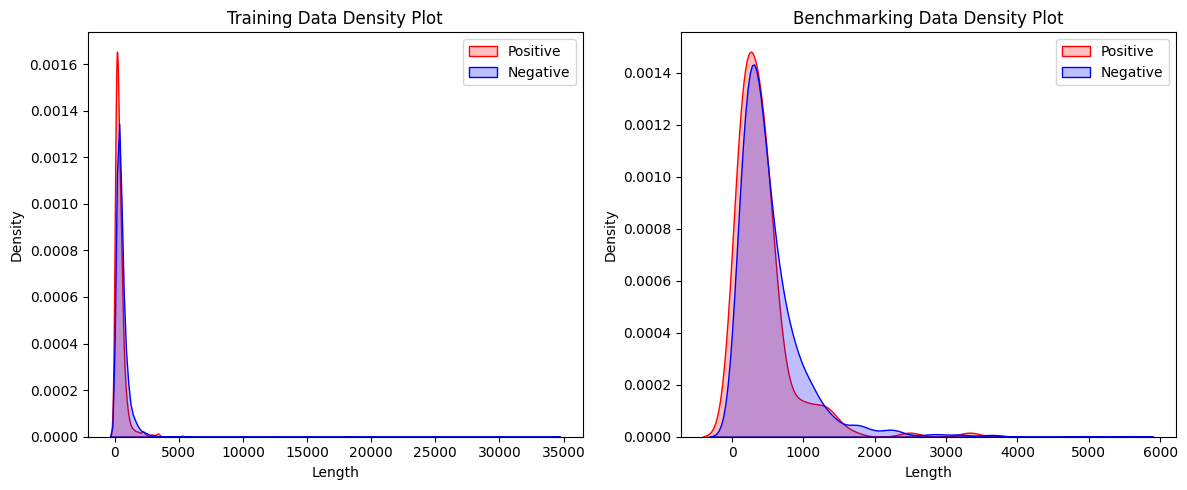

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the TSV files into DataFrames
base_path = "/content/drive/MyDrive/LB2/second_try/"
training_positive_file = os.path.join(base_path, "training_positive.tsv")
training_negative_file = os.path.join(base_path, "training_negative.tsv")
bench_positive_file = os.path.join(base_path, "benchmarking_positive.tsv")
bench_negative_file = os.path.join(base_path, "benchmarking_negative.tsv")
column_name = "Length"  # Replace with the name of the column containing the length values

# Create DataFrames for each file
training_positive_df = pd.read_csv(training_positive_file, sep='\t')
training_negative_df = pd.read_csv(training_negative_file, sep='\t')
bench_positive_df = pd.read_csv(bench_positive_file, sep='\t')
bench_negative_df = pd.read_csv(bench_negative_file, sep='\t')

# Create separate figures for training and benchmarking
plt.figure(figsize=(12, 5))

# Create density plots using Seaborn's kdeplot for training data
plt.subplot(1, 2, 1)
sns.kdeplot(data=training_positive_df, x=column_name, label='Positive', fill=True, color='r')
sns.kdeplot(data=training_negative_df, x=column_name, label='Negative', fill=True, color='b')
plt.xlabel('Length')
plt.ylabel('Density')
plt.title('Training Data Density Plot')
plt.legend()

plt.subplot(1, 2, 2)
# Create density plots using Seaborn's kdeplot for benchmarking data
sns.kdeplot(data=bench_positive_df, x=column_name, label='Positive', fill=True, color='r')
sns.kdeplot(data=bench_negative_df, x=column_name, label='Negative', fill=True, color='b')
plt.xlabel('Length')
plt.ylabel('Density')
plt.title('Benchmarking Data Density Plot')
plt.legend()

# Adjust layout and show the figures
plt.tight_layout()
plt.show()


## Merging Positive and Negative Training and Benchmarking Data



In [ ]:
import pandas as pd
import os

# Define the base path
base_path = "/content/drive/MyDrive/LB2/second_try/"

# File paths
training_positive_file = os.path.join(base_path, "training_positive.tsv")
training_negative_file = os.path.join(base_path, "training_negative.tsv")
benchmarking_positive_file = os.path.join(base_path, "benchmarking_positive.tsv")
benchmarking_negative_file = os.path.join(base_path, "benchmarking_negative.tsv")

# Load the dataframes
df_training_positive = pd.read_csv(training_positive_file, sep='\t')
df_training_negative = pd.read_csv(training_negative_file, sep='\t')
df_benchmarking_positive = pd.read_csv(benchmarking_positive_file, sep='\t')
df_benchmarking_negative = pd.read_csv(benchmarking_negative_file, sep='\t')

# Merge the dataframes
df_merged_training = pd.concat([df_training_positive, df_training_negative], ignore_index=True)
df_merged_benchmarking = pd.concat([df_benchmarking_positive, df_benchmarking_negative], ignore_index=True)

# Save the merged dataframes to TSV files
merged_training_file = os.path.join(base_path, "merged_training.tsv")
merged_benchmarking_file = os.path.join(base_path, "merged_benchmarking.tsv")

df_merged_training.to_csv(merged_training_file, sep='\t', index=False)
df_merged_benchmarking.to_csv(merged_benchmarking_file, sep='\t', index=False)

print(f"Merged training data saved to {merged_training_file}")
print(f"Merged benchmarking data saved to {merged_benchmarking_file}")


Merged training data saved to /content/drive/MyDrive/LB2/second_try/merged_training.tsv
Merged benchmarking data saved to /content/drive/MyDrive/LB2/second_try/merged_benchmarking.tsv


## **Pie Chart Analysis**

**Purpose:**  
Visualize and compare the taxonomic kingdom distributions in both training and benchmarking sets.


**Reason:**  
Ensures balanced taxonomic diversity in training and benchmarking datasets, crucial for training robust machine learning models for signal peptide detection.


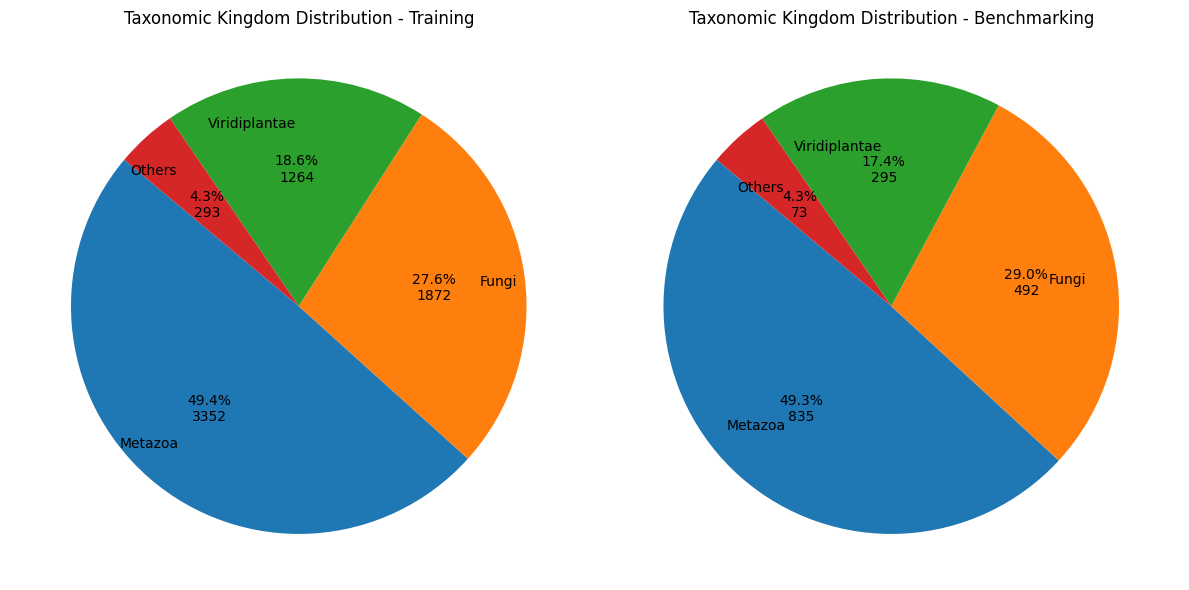

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

# Define the base path
base_path = "/content/drive/MyDrive/LB2/second_try/"
tsv_file_training = os.path.join(base_path, "merged_training.tsv")
tsv_file_benchmarking = os.path.join(base_path, "merged_benchmarking.tsv")
column_name = "Taxonomic lineage"

# Load training data
try:
    df_training = pd.read_csv(tsv_file_training, sep='\t')
except FileNotFoundError:
    print(f"File '{tsv_file_training}' not found.")
    exit(1)

# Extract the "kingdom" level taxonomic data and count occurrences for training data
def extract_kingdom(lineage):
    match = re.search(r'(\w+)\s+\(kingdom\)', lineage)
    return match.group(1) if match else 'Others'

df_training['Kingdom'] = df_training[column_name].apply(extract_kingdom)
kingdom_counts_training = df_training['Kingdom'].value_counts()

# Load benchmarking data
try:
    df_benchmarking = pd.read_csv(tsv_file_benchmarking, sep='\t')
except FileNotFoundError:
    print(f"File '{tsv_file_benchmarking}' not found.")
    exit(1)

# Extract the "kingdom" level taxonomic data and count occurrences for benchmarking data
df_benchmarking['Kingdom'] = df_benchmarking[column_name].apply(extract_kingdom)
kingdom_counts_benchmarking = df_benchmarking['Kingdom'].value_counts()

# Helper function to display both the percentage and the kingdom name
def autopct_with_labels(pct, allvalues, kingdom):
    absolute = int(round(pct/100.*sum(allvalues)))
    return f"{pct:.1f}%\n{absolute}"

# Create a figure with two subplots for the pie chart plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create a pie chart for training data
wedges, texts, autotexts = axes[0].pie(kingdom_counts_training, labels=kingdom_counts_training.index,
                                        autopct=lambda pct: autopct_with_labels(pct, kingdom_counts_training, kingdom_counts_training.index),
                                        startangle=140, textprops=dict(color="black"), labeldistance=0.8)

axes[0].set_title('Taxonomic Kingdom Distribution - Training')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Create a pie chart for benchmarking data
wedges, texts, autotexts = axes[1].pie(kingdom_counts_benchmarking, labels=kingdom_counts_benchmarking.index,
                                        autopct=lambda pct: autopct_with_labels(pct, kingdom_counts_benchmarking, kingdom_counts_benchmarking.index),
                                        startangle=140, textprops=dict(color="black"), labeldistance=0.7)

axes[1].set_title('Taxonomic Kingdom Distribution - Benchmarking')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjust layout and show the figure with subplots
plt.tight_layout()
plt.show()


## **Signal Peptide**


 **Extract Signal Peptide Ranges**:



*    Identify signal peptide ranges from text strings.
*    Visualize the amino acid composition to compare training, benchmarking, and SwissProt data.






In [ ]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

# Function to extract the second number (after "..") from a given string
def extract_numbers(text):
    matches = re.search(r'SIGNAL (\d+\.\.\d+)', text)
    if matches:
        return matches.group(1)
    return None

# Function to process a pair of FASTA and TSV files and generate the output
def process_files(fasta_file_path, tsv_file_path, output_file_path):
    # Step 1: Parse the FASTA file and create a dictionary
    fasta_dict = {}
    with open(fasta_file_path, 'r') as fasta_file:
        current_id = None
        current_sequence = ""
        for line in fasta_file:
            line = line.strip()
            if line.startswith('>'):
                # Extract the ID from the header
                header_parts = line[1:].split('|')
                if len(header_parts) >= 2:
                    current_id = header_parts[1]
                current_sequence = ""
            else:
                current_sequence += line

            if current_id:
                fasta_dict[current_id] = current_sequence

    # Step 2: Read the TSV file and extract information
    output_list = []
    with open(tsv_file_path, 'r') as tsv_file:
        for line in tsv_file:
            parts = line.strip().split('\t')
            entry = parts[0]  # Use the first column as the ID

            # Check if there is a signal peptide column (adjust the column index as needed)
            if len(parts) >= 6:
                signal_peptide_info = parts[-1]  # Extract the last column containing "Signal peptide"

                # Step 3: Extract the signal peptide information using the provided function
                signal_peptide_range = extract_numbers(signal_peptide_info)

                if signal_peptide_range is not None:
                    # Step 4: Extract the specified range of residues from the corresponding sequence
                    sequence = fasta_dict.get(entry)
                    if sequence:
                        start, end = map(int, signal_peptide_range.split('..'))
                        signal_peptide_residues = sequence[start-1:end]  # Adjust for 0-based indexing
                        output_list.append(f"{entry}:{signal_peptide_residues}")

    # Step 5: Write the list to an output file
    with open(output_file_path, 'w') as output_file:
        for item in output_list:
            output_file.write(item + '\n')

    print(f"Output file '{output_file_path}' created successfully.")


### **Extract Signal Peptides from FASTA and TSV Files:**

**FASTA File**: Contains protein sequences.
**TSV File:** Contains metadata including signal peptide information.

**Extraction Process:** The script parses the FASTA file to create a dictionary of sequences keyed by their IDs.

It then reads the TSV file to find signal peptide ranges, extracts these ranges from the corresponding sequences in the FASTA file, and writes them to an output file.

**Output Files:**

*training_sp_seq.txt*

*bench_sp_seq.txt*

These files contain the extracted signal peptide sequences for training and benchmarking datasets, respectively.

In [ ]:
# Process the training files
process_files(os.path.join('drive/MyDrive/LB2/second_try/training_positive.fasta'),
              os.path.join('drive/MyDrive/LB2/second_try/training_positive.tsv'),
              os.path.join('drive/MyDrive/LB2/second_try/training_sp_seq.txt'))

# Process the benchmark files
process_files(os.path.join('drive/MyDrive/LB2/second_try/benchmarking_positive.fasta'),
              os.path.join('drive/MyDrive/LB2/second_try/bench_positive.tsv'),
              os.path.join('drive/MyDrive/LB2/second_try/bench_sp_seq.txt'))


Output file 'drive/MyDrive/LB2/second_try/training_sp_seq.txt' created successfully.
Output file 'drive/MyDrive/LB2/second_try/bench_sp_seq.txt' created successfully.


## **Amino Acid Composition Comparison**


To compare the amino acid composition of the training and benchmarking datasets with SwissProt data, ensuring the datasets are representative and balanced for signal peptide detection.


*   **Read Sequences:** Sequences are read from training_sp_seq.txt and bench_sp_seq.txt files.

*   **Calculate Percentages:** Amino acid percentages are calculated for training and benchmarking sequences using the calculate_aa_percentages function.


*   **SwissProt Comparison:** Provided amino acid percentages from SwissProt are used as a benchmark for comparison.

*   **Data Visualization:** The calculated percentages are plotted against SwissProt data to visually compare the distributions and ensure dataset quality and balance.





This step validates that our datasets are comparable to known standards, providing confidence in the model's generalizability and performance.

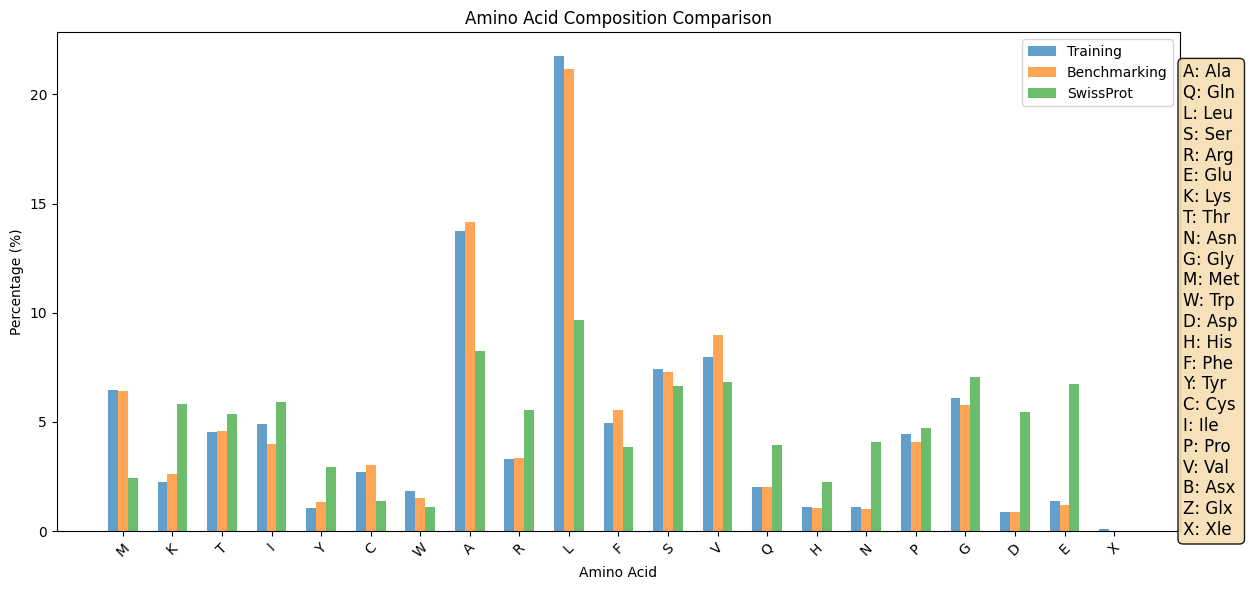

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Function to calculate amino acid percentages
def calculate_aa_percentages(sequences):
    # Combine all sequences into a single string
    all_sequences = ''.join(sequences)

    # Count occurrences of each amino acid
    aa_counts = Counter(all_sequences)

    # Calculate percentages
    total_aa_count = len(all_sequences)
    aa_percentages = {aa: count / total_aa_count * 100 for aa, count in aa_counts.items()}

    return aa_percentages

# Function to read sequences from a text file
def read_sequences_from_file(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line:
                parts = line.split(':')
                if len(parts) == 2:
                    sequences.append(parts[1])  # Get the sequence part
    return sequences

# Read sequences from training_sp_seq.txt
sequences_training = read_sequences_from_file('drive/MyDrive/LB2/second_try/training_sp_seq.txt')

# Read sequences from bench_sp_seq.txt
sequences_bench = read_sequences_from_file('drive/MyDrive/LB2/second_try/bench_sp_seq.txt')

# Calculate amino acid percentages for training and benchmark sequences
aa_percentages_training = calculate_aa_percentages(sequences_training)
aa_percentages_bench = calculate_aa_percentages(sequences_bench)

# Provided amino acid percentages from SwissProt
provided_percentages = {
    'A': 8.25, 'Q': 3.93, 'L': 9.65, 'S': 6.65,
    'R': 5.53, 'E': 6.72, 'K': 5.80, 'T': 5.36,
    'N': 4.06, 'G': 7.07, 'M': 2.41, 'W': 1.10,
    'D': 5.46, 'H': 2.27, 'F': 3.86, 'Y': 2.92,
    'C': 1.38, 'I': 5.91, 'P': 4.74, 'V': 6.85,
    'B': 0.00, 'Z': 0.00, 'X': 0.00
}

# Amino acid three-letter names
aa_three_letter = {
    'A': 'Ala', 'Q': 'Gln', 'L': 'Leu', 'S': 'Ser',
    'R': 'Arg', 'E': 'Glu', 'K': 'Lys', 'T': 'Thr',
    'N': 'Asn', 'G': 'Gly', 'M': 'Met', 'W': 'Trp',
    'D': 'Asp', 'H': 'His', 'F': 'Phe', 'Y': 'Tyr',
    'C': 'Cys', 'I': 'Ile', 'P': 'Pro', 'V': 'Val',
    'B': 'Asx', 'Z': 'Glx', 'X': 'Xle'
}

# Convert the dictionaries into lists for plotting
amino_acids = list(aa_percentages_training.keys())

# Ensure all amino acids are included in the provided percentages
for aa in amino_acids:
    if aa not in provided_percentages:
        provided_percentages[aa] = 0.0

your_percentages_training_list = [aa_percentages_training.get(aa, 0.0) for aa in amino_acids]
your_percentages_benchmarking_list = [aa_percentages_bench.get(aa, 0.0) for aa in amino_acids]
provided_percentages_list = [provided_percentages.get(aa, 0.0) for aa in amino_acids]

# Create a bar plot for the comparison
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2
x = range(len(amino_acids))

ax.bar(x, your_percentages_training_list, width, label='Training', alpha=0.7)
ax.bar([i + width for i in x], your_percentages_benchmarking_list, width, label='Benchmarking', alpha=0.7)
ax.bar([i + 2*width for i in x], provided_percentages_list, width, label='SwissProt', alpha=0.7)

ax.set_xlabel('Amino Acid')
ax.set_ylabel('Percentage (%)')
ax.set_title('Amino Acid Composition Comparison')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(amino_acids)
plt.xticks(rotation=45)
ax.legend()

# Adding the amino acid legend
legend_text = "\n".join([f"{aa}: {name}" for aa, name in aa_three_letter.items()])
props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
plt.gcf().text(0.99, 0.1, legend_text, fontsize=12, bbox=props)

plt.tight_layout()
plt.show()


In [ ]:
!ls drive/MyDrive/LB2/second_try/

bench_aa_percentages.csv			   merged_training.tsv
benchmarking_negative.tsv			   Negative_benchmarking.txt
benchmarking_positive.fasta			   Negative_training.txt
benchmarking_positive.tsv			   negative.tsv
benchmark_pos.tsv				   Positive_benchmarking.txt
bench_positive.tsv				   Positive_training.txt
bench_sp_seq.txt				   positive.tsv
cleavage_benchmarking.fasta			   To_benchmark_negative.txt
cleavage_benchmarking_invalid_signal_peptides.txt  To_benchmark_positive.txt
cleavage_benchmarking_missing_entries.txt	   training_aa_percentages.csv
cleavage_training.fasta				   training_negative.tsv
cleavage_training_invalid_signal_peptides.txt	   training_positive.fasta
cleavage_training_missing_entries.txt		   training_positive.tsv
LB2_1_data_analysis.ipynb			   training_sp_seq.txt
merged_benchmarking.tsv
